In [1]:
import numpy as np
import pandas as pd
from bokeh.plotting import figure, output_notebook, show
from bokeh.models.tools import HoverTool
from bokeh.models import ColumnDataSource
from bokeh.models import Whisker
from astropy import units as u
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
R0 = 8.5 *u.kpc
V0 = 220 *(u.km/u.s)

In [3]:
raw = pd.read_csv ('lsr.csv')
raw

,longitude,v_obs_max,v_error
0,30,112.96,8.97
1,40,102.40,10.07
2,50,72.83,10.87
3,60,53.83,3.46
4,70,29.55,11.47
5,80,17.94,11.24
6,90,10.73,6.82


In [4]:
raw['R'] = (R0*np.sin(raw['longitude']*np.pi/180))*u.kpc

In [5]:
raw['V'] = (raw['v_obs_max']+(V0*np.sin(raw['longitude']*np.pi/180)))

In [6]:
raw['V_err']= raw['v_error'].copy()

In [7]:
raw

,longitude,v_obs_max,v_error,R,V,V_err
0,30,112.96,8.97,4.250000,222.960000,8.97
1,40,102.40,10.07,5.463695,243.813274,10.07
2,50,72.83,10.87,6.511378,241.359777,10.87
3,60,53.83,3.46,7.361216,244.355589,3.46
4,70,29.55,11.47,7.987387,236.282377,11.47
5,80,17.94,11.24,8.370866,234.597706,11.24
6,90,10.73,6.82,8.500000,230.730000,6.82


In [8]:
output_notebook() 
p = figure(title = "Rotation curve", x_axis_label = 'R', y_axis_label = 'V (km/s)')
p.scatter(raw['R'], raw['V'])
p.add_tools(HoverTool(mode='vline'))
src = ColumnDataSource(data=dict(
    y = raw['R'],
    lower = raw['V'] - raw['V_err'],
    upper = raw['V']+ raw['V_err']))

w = Whisker(base='y', 
          lower='lower',
          upper='upper', 
          line_color='red', 
          dimension='height', 
          source=src)

p.add_layout(w)

show(p)

Loading BokehJS ...

Optimised parameters are: 238.52312839050632 4.2167222361018e+19 9.986657050994681


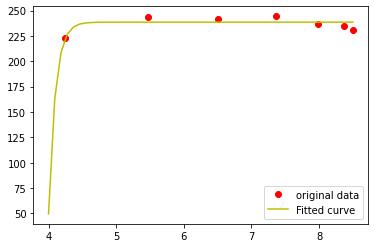

In [9]:

# Here'e a simple mathematical curve that might fit 
plt.plot(raw['R'], raw['V'], 'ro', label="original data")

def gal_curve(r,a,b,c0):
    return a-b*np.exp(-c0*r) 

R = raw['R'].values 
V = raw['V'].values 
R2 = np.linspace(4,8.5, 50) 
p0 =[250,250,0.15]

c,pcov = curve_fit(gal_curve,R,V,p0, maxfev=5000)

print('Optimised parameters are:', *c) 


plt.plot(R2,gal_curve(R2,*c), 'y', label ='Fitted curve') 
plt.legend(loc='lower right')
plt.show() 